In [1]:
import numpy as np
import pandas as pd
#plot
import seaborn as sns
import matplotlib.pyplot as plt

#dimension reduction
from sklearn.decomposition import PCA
#standardization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#confusion matrix
from sklearn.metrics import confusion_matrix
# model + model evaluation + hyper parameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, plot_roc_curve, auc


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
#hold out
from sklearn.model_selection import train_test_split

#pipeline
from imblearn.pipeline import make_pipeline
print('numpy version : ', np.__version__)
print('pandas version : ', pd.__version__)

numpy version :  1.20.1
pandas version :  1.2.4


In [2]:
df = pd.read_csv('/Users/utente/Desktop/PUSH/FabioZaccarelli/Kaggle_comp_dec2021/train.csv').sample(10000)


In [3]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1151747,1151747,2886,10,17,334,-6,1475,173,185,164,...,0,0,0,0,0,0,0,0,0,2
2947348,2947348,3406,36,17,36,8,2896,242,254,191,...,0,0,0,0,0,0,0,0,0,1
2891116,2891116,3112,16,33,169,0,1032,201,201,176,...,0,0,0,0,0,0,0,0,0,1
2879287,2879287,2947,265,32,128,23,2446,232,255,91,...,0,0,0,0,0,0,0,0,0,2
731588,731588,3324,163,21,160,110,5113,231,226,137,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1151747 to 2583580
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  10000 non-null  int64
 1   Elevation                           10000 non-null  int64
 2   Aspect                              10000 non-null  int64
 3   Slope                               10000 non-null  int64
 4   Horizontal_Distance_To_Hydrology    10000 non-null  int64
 5   Vertical_Distance_To_Hydrology      10000 non-null  int64
 6   Horizontal_Distance_To_Roadways     10000 non-null  int64
 7   Hillshade_9am                       10000 non-null  int64
 8   Hillshade_Noon                      10000 non-null  int64
 9   Hillshade_3pm                       10000 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  10000 non-null  int64
 11  Wilderness_Area1                    10000 non-null  int64
 

Elements in target columns are divided as follow:
2    5631
1    3713
3     483
7     149
6      22
4       2
Name: Cover_Type, dtype: int64
Instead in percentile elements in target columns are divided as follow:
2    0.5631
1    0.3713
3    0.0483
7    0.0149
6    0.0022
4    0.0002
Name: Cover_Type, dtype: float64
AxesSubplot(0.260833,0.125;0.503333x0.755)


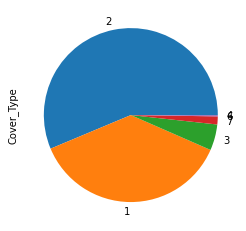

In [6]:
#which is my target? It's Cover Type
print(f"Elements in target columns are divided as follow:\n{df['Cover_Type'].value_counts()}")
print(f"Instead in percentile elements in target columns are divided as follow:\n{df['Cover_Type'].value_counts(normalize=True)}")
#Target column is not balanced
print(df['Cover_Type'].value_counts(normalize=True).plot.pie())

In [7]:
print("Types of variables:")
print(df.dtypes.tolist())
print(len(df. columns))

Types of variables:
[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]
56


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,2.005908e+06,1.151777e+06,194.0,1014117.5,2015260.5,3009351.50,3999826.0
Elevation,10000.0,2.981119e+03,2.880068e+02,1899.0,2759.0,2966.0,3221.00,4118.0
Aspect,10000.0,1.520459e+02,1.103060e+02,-29.0,60.0,124.0,248.25,390.0
Slope,10000.0,1.503190e+01,8.496699e+00,-2.0,9.0,14.0,20.00,61.0
Horizontal_Distance_To_Hydrology,10000.0,2.712670e+02,2.261355e+02,-42.0,109.0,212.0,362.00,1602.0
Vertical_Distance_To_Hydrology,10000.0,5.145290e+01,6.725633e+01,-203.0,4.0,32.0,78.00,567.0
Horizontal_Distance_To_Roadways,10000.0,1.741271e+03,1.290473e+03,-190.0,817.0,1425.0,2340.00,7468.0
Hillshade_9am,10000.0,2.121306e+02,3.026486e+01,25.0,197.0,218.0,233.00,261.0
Hillshade_Noon,10000.0,2.213353e+02,2.187916e+01,68.0,210.0,224.0,237.00,260.0
Hillshade_3pm,10000.0,1.405657e+02,4.351142e+01,-35.0,115.0,142.0,168.00,266.0


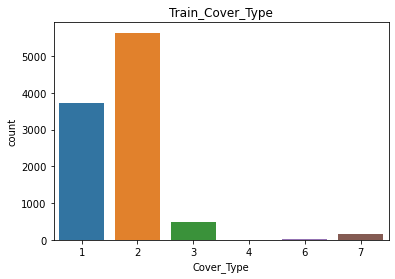

In [9]:
sns.countplot(x = df['Cover_Type'])
plt.title('Train_Cover_Type')
plt.show()

Text(0.5, 1.0, 'Features correlate con Cover_Type')

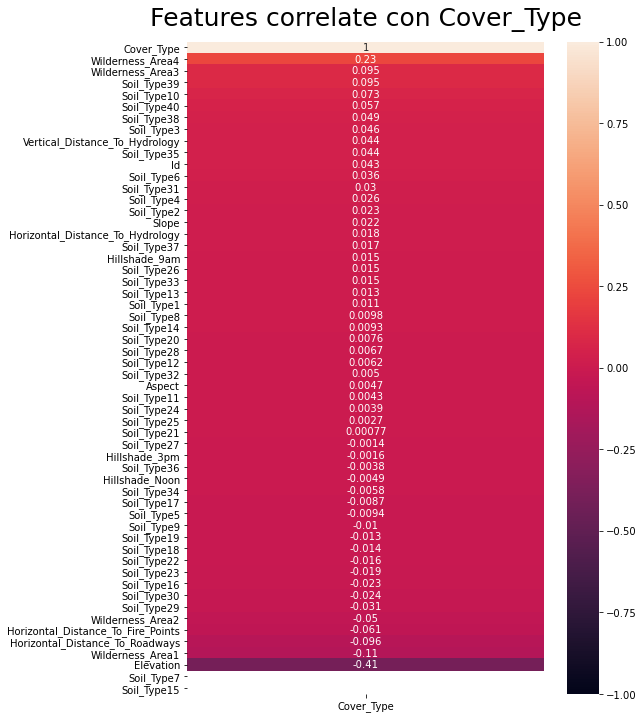

In [10]:
plt.figure(figsize=(8,12))
heatmap = sns.heatmap(df.corr()[['Cover_Type']].sort_values(by='Cover_Type', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features correlate con Cover_Type', fontdict={'fontsize':25}, pad=16)

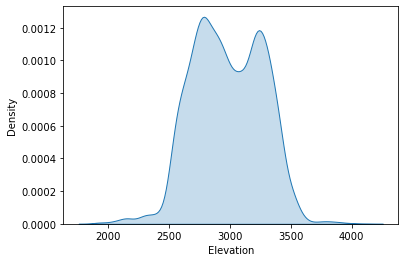

In [11]:
sns.kdeplot(x = df['Elevation'], fill=True)
plt.show()

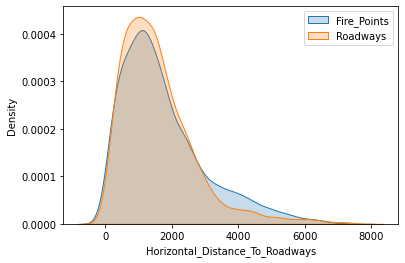

In [12]:
sns.kdeplot(x = df['Horizontal_Distance_To_Roadways'], fill = True)
sns.kdeplot(x = df['Horizontal_Distance_To_Fire_Points'], fill = True)
plt.legend(labels = ["Fire_Points","Roadways"])
plt.show()

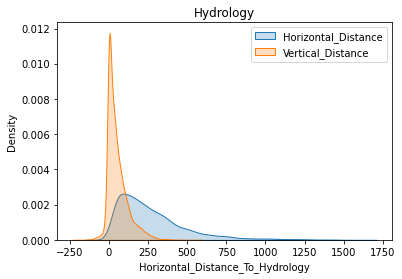

In [13]:
sns.kdeplot(x = df['Horizontal_Distance_To_Hydrology'], fill = True)
sns.kdeplot(x = df['Vertical_Distance_To_Hydrology'], fill = True)
plt.legend(labels = ["Horizontal_Distance","Vertical_Distance"])
plt.title('Hydrology')
plt.show()

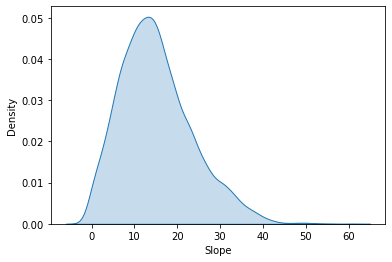

In [14]:
sns.kdeplot(x = df['Slope'], fill = True)
plt.show()

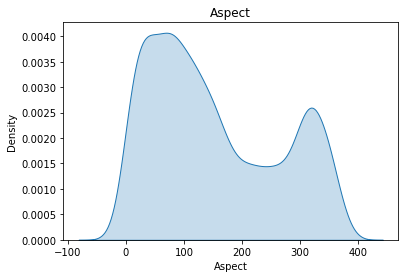

In [15]:
sns.kdeplot(x = df['Aspect'], fill = True)
plt.title('Aspect')
plt.show()

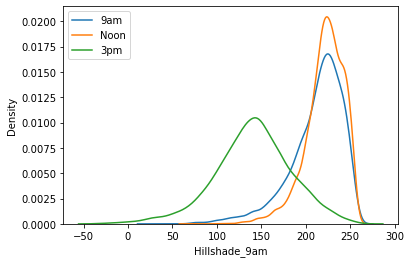

In [16]:
sns.kdeplot(data = df['Hillshade_9am'])
sns.kdeplot(data = df['Hillshade_Noon'])
sns.kdeplot(data = df['Hillshade_3pm'])
plt.legend(labels = ["9am","Noon","3pm"])
plt.show()

Text(0.5, 1.0, 'Wilderness_Area1 & 3')

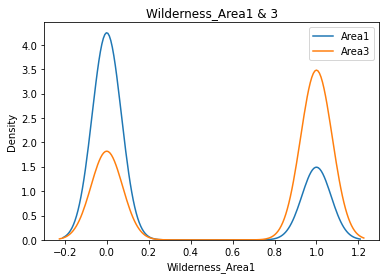

In [17]:
sns.kdeplot(x = df['Wilderness_Area1'])
sns.kdeplot(x = df['Wilderness_Area3'])

plt.legend(labels = ["Area1","Area3"])
plt.title('Wilderness_Area1 & 3')

Text(0.5, 1.0, 'Wilderness_Area2 & 4')

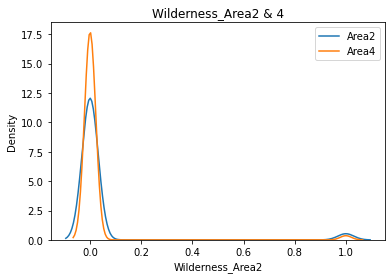

In [18]:
sns.kdeplot(x = df['Wilderness_Area2'])
sns.kdeplot(x = df['Wilderness_Area4'])

plt.legend(labels = ["Area2","Area4"])
plt.title('Wilderness_Area2 & 4')

Text(0.5, 1.0, 'Correlation matrix')

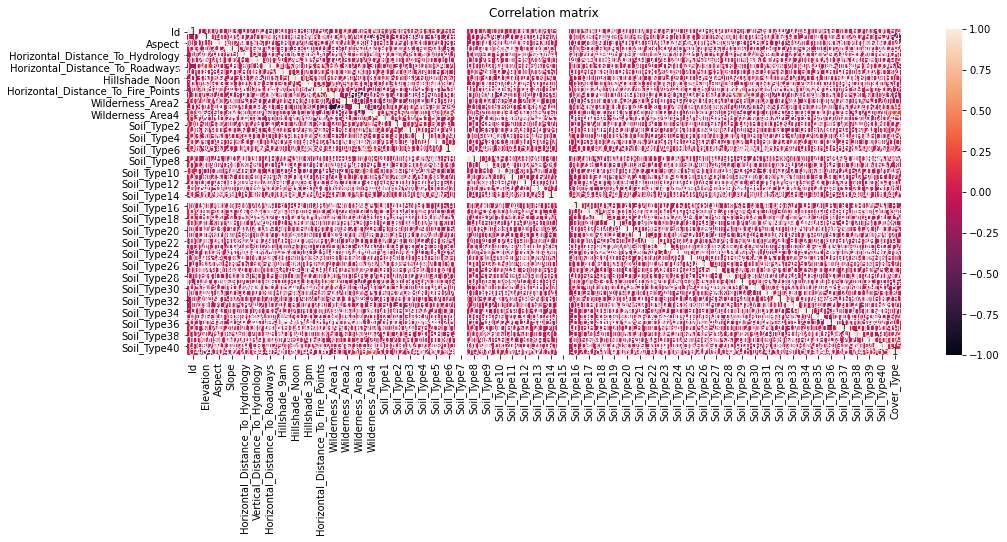

In [19]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation matrix', fontdict={'fontsize':12}, pad=12)

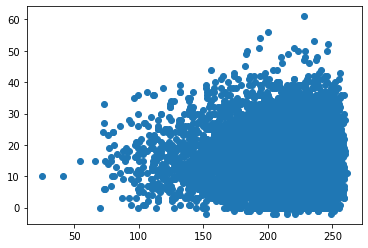

In [20]:
plt.scatter(df['Hillshade_9am'], df['Slope'])

In [21]:
#new dataframe dropping target 7 and 6
newdf = df[df["Cover_Type"] != 7]
newdf = newdf[newdf["Cover_Type"] != 6]

In [22]:
newdf['Cover_Type'].value_counts()

2    5631
1    3713
3     483
4       2
Name: Cover_Type, dtype: int64

In [23]:
newdf.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1151747,1151747,2886,10,17,334,-6,1475,173,185,164,...,0,0,0,0,0,0,0,0,0,2
2947348,2947348,3406,36,17,36,8,2896,242,254,191,...,0,0,0,0,0,0,0,0,0,1
2891116,2891116,3112,16,33,169,0,1032,201,201,176,...,0,0,0,0,0,0,0,0,0,1
2879287,2879287,2947,265,32,128,23,2446,232,255,91,...,0,0,0,0,0,0,0,0,0,2
731588,731588,3324,163,21,160,110,5113,231,226,137,...,0,0,0,0,0,0,0,0,0,1


In [24]:
X_train = newdf.drop('Cover_Type', axis=1) 
Y_train = newdf['Cover_Type']

In [25]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

In [26]:
class RiduzioneMemoria(BaseEstimator, TransformerMixin):
    
    def __init__(self, df, verbose=True):
        self.df = df
        self.verbose = verbose
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

    #def reduce_mem_usage(df, verbose=True):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        start_mem = df.memory_usage().sum() / 10242
        for col in df.columns:
            col_type = df[col].dtypes
            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()
                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
        end_mem = df.memory_usage().sum() / 10242
        if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
        return df

In [27]:
class CapAngularValues(BaseEstimator, TransformerMixin):

    def __init__(self, column):
        self.column = column


    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()

        df[column][df[column] < 0] += 360
        df[column][df[column] > 359] -= 360

        return df

In [28]:
class ManhattanDistance(BaseEstimator,TransformerMixin):

    def __init__(self,column):
        self.column = column 

    def fit(self, X,y=None):
        return self

    def transform(self, X):
        df= X.copy()

        df[self.column] = [abs(x) for x in df[self.column]]
        
        return df

In [29]:
class ColumnAggregation(BaseEstimator, TransformerMixin):

    def __init__(self, column, start_with):
        self.column = column
        self.start_with = start_with

    def fit(self, X,y=None):
        return self

    def transform(self, X):
        df = X.copy()

        column_to_aggregate = [x for x in df.columns if x.startswith(self.start_with)]
        df[self.column] = df[column_to_aggregate].sum(axis=1)

        return df

In [31]:
pipe = make_pipeline( #RiduzioneMemoria(df),
                      #CapAngularValues(column = 'Aspect'),
                      ManhattanDistance(column = 'Horizontal_Distance_To_Hydrology'),
                      ManhattanDistance(column = 'Vertical_Distance_To_Hydrology'),
                      ManhattanDistance(column = 'Horizontal_Distance_To_Roadways'),
                      ManhattanDistance(column = 'Horizontal_Distance_To_Fire_Points'),                
                      ColumnAggregation(column = 'Soil_Type_count', start_with = 'Soil_Type'),
                      ColumnAggregation(column = 'Wilderness_count', start_with = 'Wilderness'),                  
                      PCA(n_components = 10),
                      MinMaxScaler(),
                      DecisionTreeClassifier()
                      #RandomForestClassifier()
                      #GradientBoostingClassifier()
                      
)
 
params = {
    'decisiontreeclassifier__criterion': ['gini','entropy'],
    'decisiontreeclassifier__splitter': ['random','best']}

#inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
#outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=40)
                                        
gs_pipe = GridSearchCV(pipe,param_grid=params,cv=5,scoring='accuracy', verbose = 3)
gs_pipe.fit(X_train,Y_train)
best_estimators = gs_pipe.best_estimator_                                       

                                

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__splitter=random; total time=   0.1s


/Users/utente/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV 2/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__splitter=random; total time=   0.1s
[CV 3/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__splitter=random; total time=   0.1s
[CV 4/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__splitter=random; total time=   0.1s
[CV 5/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__splitter=random; total time=   0.1s
[CV 1/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__splitter=best; total time=   0.2s
[CV 2/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__splitter=best; total time=   0.2s
[CV 3/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__splitter=best; total time=   0.3s
[CV 4/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__splitter=best; total time=   0.3s
[CV 5/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__splitter=best; total time= 

In [32]:
print(gs_pipe.best_score_)

0.8860511131991956


In [ ]:
submission
test = pd.read_csv('/Users/utente/Desktop/PUSH/FabioZaccarelli/Kaggle_comp_dec2021/test.csv')

In [ ]:
predictions = gs_pipe.predict(test)
df_sub = pd.DataFrame(predictions, index=test["Id"], columns=["Cover_Type"])
df_sub.to_csv("Submission_FabioZaccarelli.csv")
